In [3]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

In [4]:
final_df = pd.read_csv('../data/processed/books_dedup.csv') 
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1370 entries, 0 to 1369
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           1369 non-null   object 
 1   author          1369 non-null   object 
 2   rating          1345 non-null   float64
 3   rating_count    1345 non-null   float64
 4   description     878 non-null    object 
 5   isbn            1248 non-null   object 
 6   image           1367 non-null   object 
 7   book_url        1370 non-null   object 
 8   pages           1369 non-null   float64
 9   published_year  878 non-null    float64
 10  language        878 non-null    object 
 11  genres          1369 non-null   object 
 12  source          1370 non-null   object 
dtypes: float64(4), object(9)
memory usage: 139.3+ KB


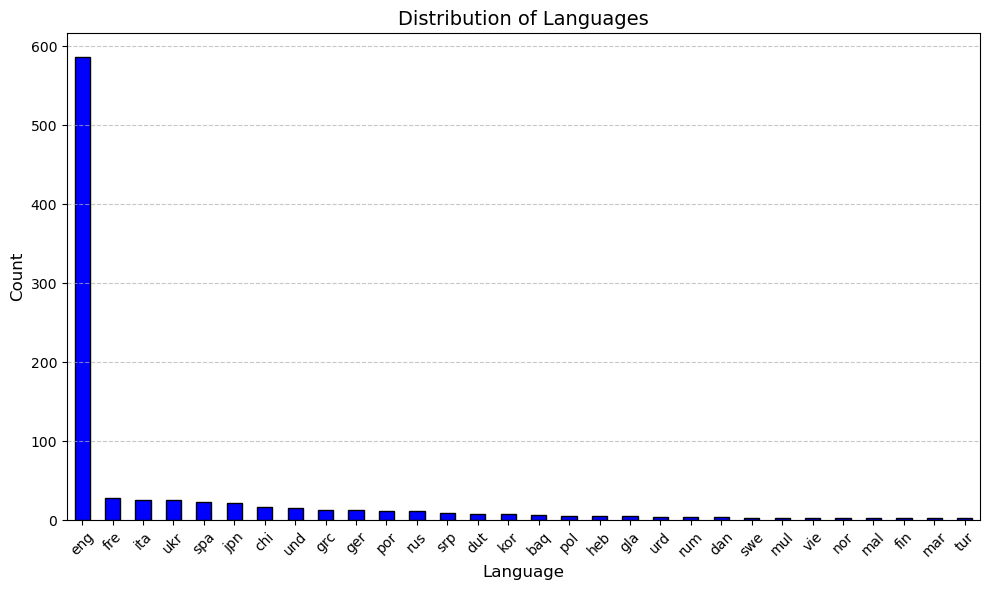

In [12]:
counts = final_df['language'].value_counts()
counts_filtered = counts [counts > 1]

counts_df = counts.reset_index()
counts_df.columns = ['Language', 'Frequency']

plt.figure(figsize=(10, 6))
counts_filtered.plot(kind='bar', color='blue',edgecolor='black' )

plt.title('Distribution of Languages', fontsize=14)
plt.xlabel('Language', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [13]:
thick_book = final_df.sort_values(by='pages', ascending=False).head(135)
thick_book.head(15)

,title,author,rating,rating_count,description,isbn,image,book_url,pages,published_year,language,genres,source
437,"Harry Potter Series Box Set (Harry Potter, #1-7)",J.K. Rowling,4.73,303153.0,NaN,9780545044257.0,https://m.media-amazon.com/images/S/compressed...,https://www.goodreads.com/book/show/862041.Har...,4000.0,NaN,NaN,"Fantasy, Young Adult, Fiction, Harry Potter, M...",web_scraping
181,"The Little House Collection (Little House, #1-9)",Laura Ingalls Wilder,4.36,157309.0,NaN,9780060529963.0,https://m.media-amazon.com/images/S/compressed...,https://www.goodreads.com/book/show/114345.The...,2700.0,NaN,NaN,"Classics, Historical Fiction, Childrens, Ficti...",web_scraping
311,The Complete Sherlock Holmes,Arthur Conan Doyle,4.51,217198.0,NaN,NaN,https://m.media-amazon.com/images/S/compressed...,https://www.goodreads.com/book/show/188572.The...,1796.0,NaN,NaN,"Classics, Mystery, Fiction, Crime, Short Stories",web_scraping
7,J.R.R. Tolkien 4-Book Boxed Set: The Hobbit an...,J.R.R. Tolkien,4.62,144569.0,NaN,9780345538376.0,https://m.media-amazon.com/images/S/compressed...,https://www.goodreads.com/book/show/30.J_R_R_T...,1728.0,NaN,NaN,"Fantasy, Fiction, Classics, Adventure, Science...",web_scraping
249,The Iliad / The Odyssey,Homer,4.07,84068.0,NaN,9780147712554.0,https://m.media-amazon.com/images/S/compressed...,https://www.goodreads.com/book/show/1375.The_I...,1556.0,NaN,NaN,"Classics, Fiction, Poetry, Mythology, Fantasy",web_scraping
568,Bible,Bible,4.00,80.0,Genesis appropriately stands as the first book...,9780801014390,https://covers.openlibrary.org/b/id/12707846-L...,https://openlibrary.org/works/OL17732W,1464.0,1200.0,ukr,"Manuscripts, Latin (Medieval and modern), Glos...",api
23,Les Misérables,Victor Hugo,4.21,845250.0,NaN,9780451525260.0,https://m.media-amazon.com/images/S/compressed...,https://www.goodreads.com/book/show/24280.Les_...,1463.0,NaN,NaN,"Classics, Fiction, Historical Fiction, Literat...",web_scraping
305,The Complete Calvin and Hobbes,Bill Watterson,4.81,42233.0,NaN,9780740748479.0,https://m.media-amazon.com/images/S/compressed...,https://www.goodreads.com/book/show/24812.The_...,1456.0,NaN,NaN,"Comics, Humor, Graphic Novels, Fiction, Classics",web_scraping
424,War and Peace,Leo Tolstoy,4.17,366769.0,NaN,9780192833983.0,https://m.media-amazon.com/images/S/compressed...,https://www.goodreads.com/book/show/656.War_an...,1392.0,NaN,NaN,"Classics, Fiction, Historical Fiction, Russia,...",web_scraping
445,The Complete Novels,Jane Austen,4.57,34038.0,NaN,9780140259445.0,https://m.media-amazon.com/images/S/compressed...,https://www.goodreads.com/book/show/14905.The_...,1344.0,NaN,NaN,"Classics, Fiction, Romance, Historical Fiction...",web_scraping


In [16]:
#Checking to see top rated authors 
top_rated_authors = final_df.groupby('author')['rating'].mean().sort_values(ascending =False).head(135)
print (top_rated_authors)

author
John Dryden                 5.000000
Saint Ignatius of Loyola    5.000000
T. E. Lawrence              5.000000
Cesare Beccaria             5.000000
Benjamin Constant           5.000000
                              ...   
Bryce Courtenay             4.360000
Stefan Zweig                4.358333
Sarah J. Maas               4.357500
Douglas Adams               4.355011
Antoine de Saint-Exupéry    4.354696
Name: rating, Length: 135, dtype: float64


In [17]:
#Realised that the dataset might be small 
popular_authors = final_df[final_df['rating_count']>10000]
pop_authors = popular_authors.groupby('author')['rating'].mean().sort_values(ascending =False).head(135)
print (pop_authors)

author
Bill Watterson       4.810000
Art Spiegelman       4.580000
Larry McMurtry       4.580000
Brandon Sanderson    4.575000
Rebecca Yarros       4.570000
                       ...   
Wilson Rawls         4.130000
Neil Gaiman          4.128000
Kurt Vonnegut Jr.    4.125000
Freida McFadden      4.125000
John Steinbeck       4.123333
Name: rating, Length: 135, dtype: float64


C:\Users\akoki\AppData\Local\Temp\ipykernel_13612\2610801851.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_rated['rating'], y=top_rated.index, palette='viridis')


(3.5, 5.0)

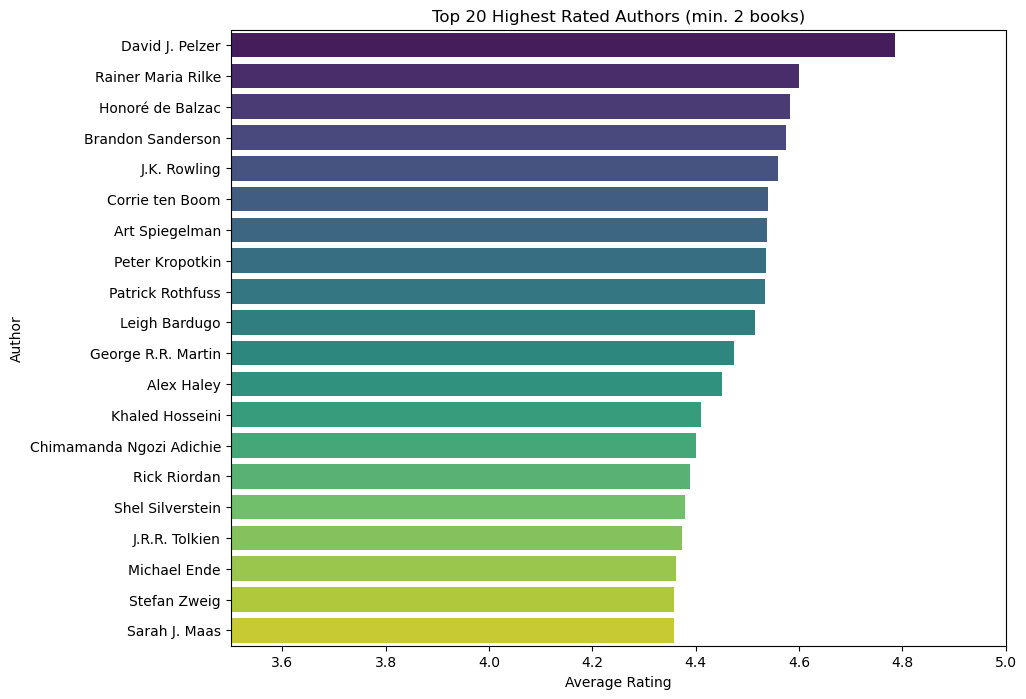

In [25]:

# Calculate average rating and count of books per author
author_stats = final_df.groupby('author').agg({'rating': 'mean', 'title': 'count'}).rename(columns={'title': 'book_count'})

#at least 2 books 
top_rated = author_stats[author_stats['book_count'] > 1].sort_values(by='rating', ascending=False).head(20)

# Plot
plt.figure(figsize=(10, 8))
sns.barplot(x=top_rated['rating'], y=top_rated.index, palette='viridis')
plt.title('Top 20 Highest Rated Authors (min. 2 books)')
plt.xlabel('Average Rating')
plt.ylabel('Author')
plt.xlim(3.5, 5) 

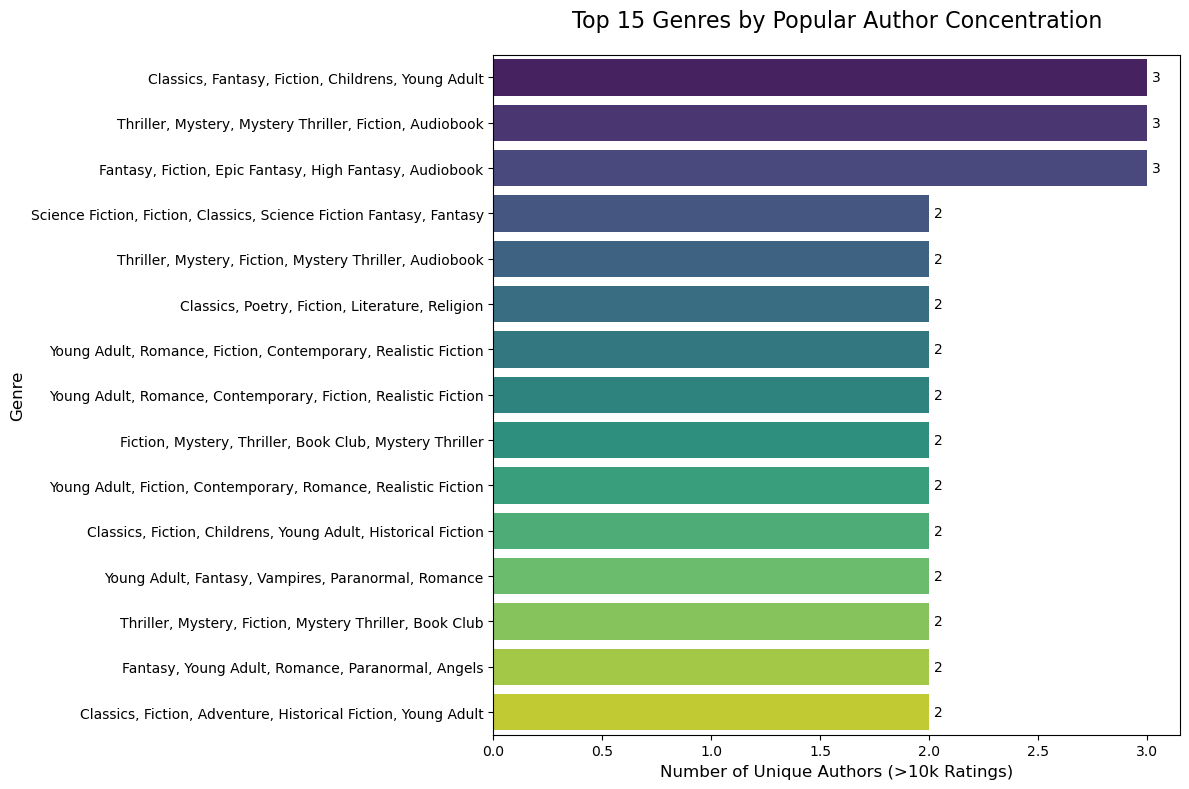

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Get the Top 15 genres only (to stop the overlapping)
top_n = 15
genre_plot_data = genre_author_counts.head(top_n)

# 2. Set a larger figure size for readability
plt.figure(figsize=(12, 8))

# 3. Create the plot with the 'hue' fix to avoid warnings
ax = sns.barplot(
    x=genre_plot_data.values, 
    y=genre_plot_data.index, 
    hue=genre_plot_data.index,
    palette='viridis', 
    legend=False
)

# 4. Add the actual numbers to the end of the bars so you don't need a crowded X-axis
for i in ax.containers:
    ax.bar_label(i, padding=3, fontsize=10)

# 5. Improve the titles and labels
plt.title(f'Top {top_n} Genres by Popular Author Concentration', fontsize=16, pad=20)
plt.xlabel('Number of Unique Authors (>10k Ratings)', fontsize=12)
plt.ylabel('Genre', fontsize=12)

# 6. Adjust layout so nothing is cut off
plt.tight_layout()

plt.show()

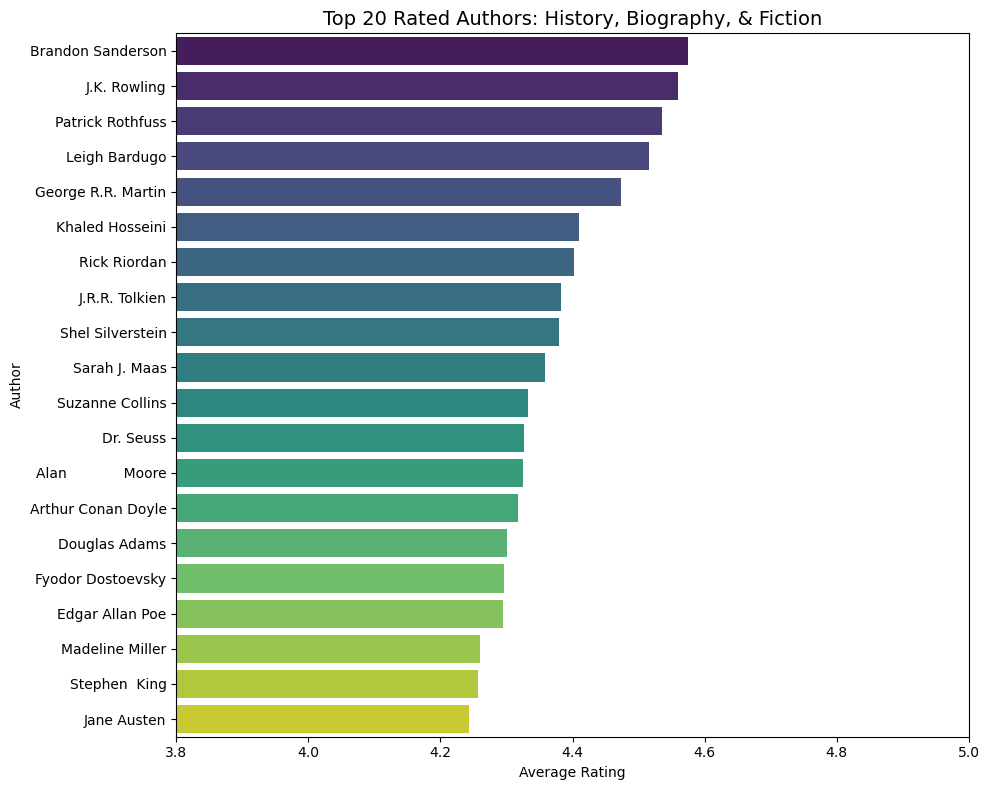

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Define your focus keywords
# We use partial matches to catch things like "Historical Fiction" or "Autobiography"
pattern = 'history|biography|fiction'

# 2. Filter using the correct column name 'genres'
# .str.contains handles the fact that 'genres' might be a long string
filtered_df = final_df[
    (final_df['genres'].str.contains(pattern, case=False, na=False)) & 
    (final_df['rating_count'] > 5000) # Adjusted to find "Popular" but not "Impossible"
].copy()

# 3. Aggregate by Author
author_focus = filtered_df.groupby('author').agg({
    'rating': 'mean',
    'title': 'count'
}).rename(columns={'title': 'book_count'})

# 4. Keep authors with at least 2 books and get Top 20
top_20_authors = author_focus[author_focus['book_count'] > 1].sort_values(by='rating', ascending=False).head(20)

# 5. Plotting
plt.figure(figsize=(10, 8))
sns.barplot(
    x=top_20_authors['rating'], 
    y=top_20_authors.index, 
    hue=top_20_authors.index, 
    palette='viridis', 
    legend=False
)

plt.title('Top 20 Rated Authors: History, Biography, & Fiction', fontsize=14)
plt.xlabel('Average Rating')
plt.ylabel('Author')
plt.xlim(3.8, 5.0) 

plt.tight_layout()
plt.show()

In [36]:
#authors with > 10,000 ratings
pop_authors = final_df[final_df['rating_count'] > 10000]

#a list of Author + their most common Genre
# 'first' genre found in their 'genres' column
author_list = pop_authors.groupby('author').agg({
    'genres': lambda x: x.iloc[0].split(',')[0],
    'rating': 'mean',
    'rating_count': 'sum'
}).sort_values(by='rating', ascending=False).head(30)

print(author_list)

                                  genres    rating  rating_count
author                                                          
Bill Watterson                    Comics  4.810000       42233.0
Art Spiegelman            Graphic Novels  4.580000      255254.0
Larry McMurtry                   Fiction  4.580000      243377.0
Brandon Sanderson                Fantasy  4.575000     1654209.0
Rebecca Yarros                   Fantasy  4.570000     3564987.0
J.K. Rowling                     Fantasy  4.560000    36914989.0
Patrick Rothfuss                 Fantasy  4.535000     1707582.0
Sergio Cobo                     Thriller  4.530000       20447.0
Leigh Bardugo                    Fantasy  4.515000     1929662.0
Corrie ten Boom               Nonfiction  4.480000      357725.0
George R.R. Martin               Fantasy  4.473333     4611157.0
Kathryn Stockett                 Fiction  4.470000     3027931.0
Jon Stone                  Picture Books  4.460000      127063.0
Alex Haley            His

In [39]:
author_list_df = author_list.reset_index()
author_list_df.columns =  ['author', 'genres', 'rating', 'rating_count']
author_list_df

,author,genres,rating,rating_count
0,Bill Watterson,Comics,4.810000,42233.0
1,Art Spiegelman,Graphic Novels,4.580000,255254.0
2,Larry McMurtry,Fiction,4.580000,243377.0
3,Brandon Sanderson,Fantasy,4.575000,1654209.0
4,Rebecca Yarros,Fantasy,4.570000,3564987.0
5,J.K. Rowling,Fantasy,4.560000,36914989.0
6,Patrick Rothfuss,Fantasy,4.535000,1707582.0
7,Sergio Cobo,Thriller,4.530000,20447.0
8,Leigh Bardugo,Fantasy,4.515000,1929662.0
9,Corrie ten Boom,Nonfiction,4.480000,357725.0


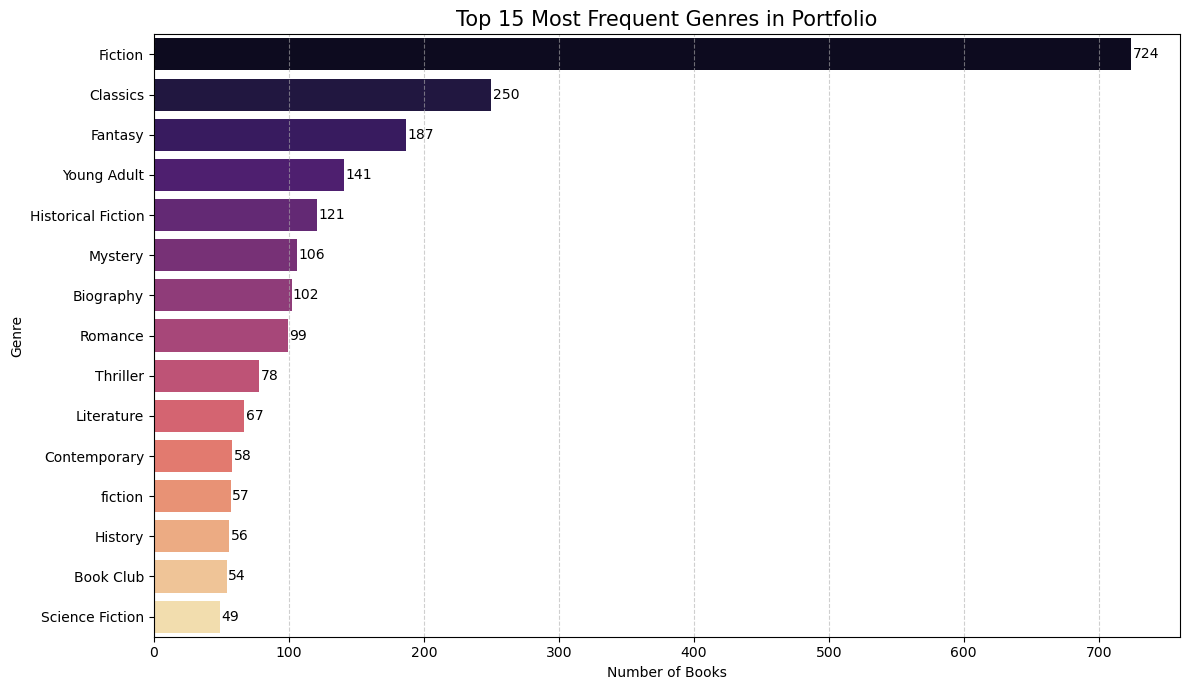

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Clean the 'genres' column
# Since 'genres' often contains lists (e.g. "Fiction, Fantasy"), we split and explode them
genre_series = final_df['genres'].str.split(',').explode().str.strip()

# Get the counts and convert to a DataFrame
genre_counts = genre_series.value_counts().reset_index()
genre_counts.columns = ['Genre', 'Frequency']



# Filter for Top 15 to keep the graph readable
top_genres = genre_counts.head(15)

# Plot
plt.figure(figsize=(12, 7))
sns.barplot(
    x='Frequency', 
    y='Genre', 
    data=top_genres, 
    hue='Genre', 
    palette='magma', 
    legend=False
)

# Adding the exact count at the end of each bar
for i, value in enumerate(top_genres['Frequency']):
    plt.text(value + 1, i, str(int(value)), va='center', fontsize=10)

plt.title('Top 15 Most Frequent Genres in Portfolio', fontsize=15)
plt.xlabel('Number of Books')
plt.ylabel('Genre')
plt.grid(axis='x', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()